In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
print("Imports Complete")

Imports Complete


### Part I- Using a sampling to Estimate Top Sales

Part I of this assignment aims to show the importance of a good sampling strategy for an analytics project. The easiest way to subsample from a large dataset is to use a random approach. 

Say, for instance, that we have a dataset representing a company's total sales transaction over an extended period of time. In real life, a large company may process millions of transactions in a single year. For the purpose of this assignment, we'll illustrate the importance of sampling by working with a small dataset consisting of only $805,000 transactions. 

The data is stored in the file "data/temps.txt". This file is relative small (59M) and could be stored in RAM. However, suppose that you're working with a much larger file. You cannot read the complete file and store it in RAM. As such, you are not permitted to use Python functions that load all data in RAM. E.g.:


`open("data/temps.text").readlines()`

However, reading one line at a time is permitted.

```python
for line in open("data/temps.text"):
    # do something with line

````

You need to estimate the average sale amount from the 100  largest transactions. Obviously, this can be easily done by reading the file, sorting by transaction amount, selecting the top 100 transactions and computing their average. We will however assume that we can work with only a sample of the data, which is a realistic scenario when dealing with big data and running many computationally-intensive computations. Here, we will only be working 1\% of the data. 


### Q.1

Select exactly 1% of the data (8050 lines) and compute the average sale amount for the largest 100 sales transaction. You cannot read all the data at once, as the data would be too large to fit in RAM in real life, but it is okay to read one line at a time. Use a seed of 42 in order to ensure everybody samples the same data.

Note that depending on your sampling strategy, your code may take a few minutes to run. For fast implementation, you use the file `seek()` method. A fast implementation will be helpful since you will need to read the file several times for one of the questions below.

In [2]:
# Write your answer here
lines = []
count = 0
for line in open("data/temp.txt", 'r'):
    line = line.split()
    lines.append(line)
print("Done appending lines in the file.")
random.seed(42)
sample_data = random.sample(lines, int(len(lines)*0.01))

Done appending lines in the file.


### Q. 2

Store the lines into a DataFrame. Recall that each item of the array is a collection of three fields separated by tab values. Call this `DF` data and name the columns `X`, `Y` and `Amount`. 

You can print the first few line of your dataframe to see what the data looks like.

In [3]:
# Write your answer here
database = {'X':[],'Y':[],'Amount':[]}
for data in sample_data:
    database['X'].append(data[0])
    database['Y'].append(data[1])
    database['Amount'].append(data[2])
df = pd.DataFrame(database)
df.head()

X                          Y  \
0   1.235771639491190399e+00   2.533749148603056334e+00   
1   3.662823167817032211e+00   1.477821907098475052e+00   
2  -3.076780831535720573e+00   7.533553918765194091e+00   
3   8.406412052356969866e+00  -2.224909952909336575e+00   
4   1.021083727473410718e+01  -2.555957335994505808e+00   

                     Amount  
0  3.023956870148103881e+00  
1  4.959054072333492158e+00  
2  8.276126116517630749e+00  
3  8.197297545781840000e+00  
4  9.207686197196514044e+00

### Q.3

As you may have noticed, the data is stored in scientific notation (`e+`), which has caused Pandas to read the columns as Object type. To make it easier to manipulate the data, change the type of all three columns to `float64` using the `astype`. We round the values to two decimal places.

* Confirm that the new type is indeed `float64` (use the `DataFrame` `dtype` method to do so).
* Display the first five lines to ensure that the rounding worked.

In [4]:
# Write your answer here
df = df.astype('float64')
df = df.round(2)
df.head()

X     Y  Amount
0   1.24  2.53    3.02
1   3.66  1.48    4.96
2  -3.08  7.53    8.28
3   8.41 -2.22    8.20
4  10.21 -2.56    9.21

### Q.4

Calculate the average of the top 100 values in the column `Amount`.


In [5]:
# Write your answer here
amount_values = df.nlargest(100, ['Amount'])
total_amount = amount_values['Amount'].sum()
average_calculated = total_amount/100
print('Average Amount:', average_calculated)

Average Amount: 19175.101000000002


### Q.5

* Repeat the steps above 10 times:
  1. Sample exactly 10\% of the data
  2. Save the subsample into a dataframe called `data`    
  3. Convert the data types and round the values
  4. Compute the mean of largest 100 `Amount` values 
  5. Save the values to a list called `means_top_100`

In [6]:
# Write your answer here
means_top_100 = []

for run in range(10):
    lines = []
    count = 0
    for line in open("data/temp.txt", 'r'):
        line = line.split()
        lines.append(line)
    random.seed(42)
    sample_data = random.sample(lines, int(len(lines)*0.1))
    database = {'X':[],'Y':[],'Amount':[]}
    for data in sample_data:
        database['X'].append(data[0])
        database['Y'].append(data[1])
        database['Amount'].append(data[2])
    data = pd.DataFrame(database)
    data = data.astype('float64')
    data = data.round(2)
    amount_values_df = data.nlargest(100, ['Amount'])
    total_amount = amount_values_df['Amount'].sum()
    average_amount = total_amount/100
    means_top_100.append(average_amount)
    print(means_top_100)

[69156.96500000001]
[69156.96500000001, 69156.96500000001]
[69156.96500000001, 69156.96500000001, 69156.96500000001]
[69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001]
[69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001]
[69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001]
[69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001]
[69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001]
[69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001]
[69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69156.96500000001, 69

### Q.6

What do you observe? Are the means of the largest 100 `Amount` values consistent across your 10 runs? 

The observations when running the means of the largest 100 Amount values show that they are consistent across the 10 runs. The value of 69156.965 is a consistent value when printed. 

### Q.7 

In addition to the column `Amount`, the data contians 2 addition columns, `X` and `Y`. These two columns were generated by dimensionality reduction of raw data that is not included.

The file `representative_sample.csv` contains obbservations from 1k customers. Half of these spent less than \\$1000 and the other half spent more than \\$1000.

Plot the data stored in `representative_sample.csv` such that dots with `Amount` values less than or equal to \\$1000 are shown in blue, and points with Amount values greater than \\$1000 are shown in red.

Make sure you data has `x` and `y` labels, as well as a `legend`

The plot will resemble what follows. 

![](https://www.dropbox.com/s/qauj4yb2hj5044q/dots_distribution.png?dl=1)


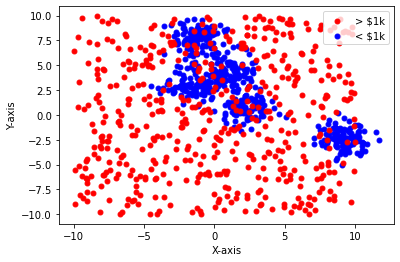

In [7]:
# Write your answer here
x1 = []
y1 = []
a1 = []

x2 = []
y2 = []
a2 = []

for n in open('data/representative_sample.csv', 'r'):
    rl = n.rsplit(',')
    if round(float(rl[-1]), 2) <= 1000.00:
        x1.append(round(float(rl[0]), 2))
        y1.append(round(float(rl[1]),2))
        a1.append(round(float(rl[2]), 2))
    elif round(float(rl[-1]), 2) > 1000.00:
        x2.append(round(float(rl[0]), 2))
        y2.append(round(float(rl[1]), 2))
        a2.append(round(float(rl[2]), 1))
        
less = plt.scatter(x1, y1, s=24, c='blue')
greater = plt.scatter(x2, y2, s=24, c='red')
plt.legend((greater, less),("> $1k", "< $1k"), loc='upper right')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

As you noted from the above, the data contains three relatively large clusters and many outliers (red dots). If you inpect the blue uppersations, you'll notice that there predominantly below \\$20. The red observations, on the other hand, have higher `Amounts`, some with values higher than \\$75k. 
While the dataset was intendedly balanced (500 less than \\$1k and and 500 more than \\$1k ), the reality is that only a small subset of the transactions is > $1000, their variance is very large. Thus, the values sampled are highly variable, causing the inconsistent means computed using sampling. 



### Q.8

* Plot a histogram showing the distribution of `Amounts` in your data.

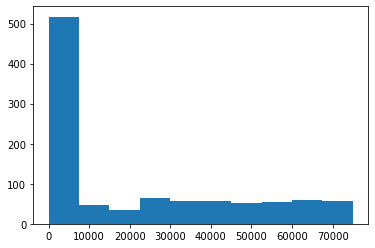

In [8]:
# Write your answer here
a3 = a1 + a2
plt.hist(a3)
# Shows the histogram
plt.show()


In what follows, we'll use a different sampling strategy. Specifically we are to "gird" the data and sample independently in each grid cell. The gird would look like the following:



![](https://www.dropbox.com/s/h1y38coydobhxfk/grid.png?dl=1)



One strategy we could use is to sample a certain number of points proportional to how many points in a cell there are. However, that is not a good idea here, since populus cells (some of which contain thousands of points) will end up contributing hundreds of points; those are mostly blue. This would in turn cause red points. (top `Amounts`) to be under-represented in our samples.

Instead, we will employ a strategy in which the number of points selected from each cell is inversely proportional to the number of points in the cell. Consider 4 cells with the following distribution of 100 points: $[1, 12, 80, 7]$. Say we need to sample 10 points in accordance with the importance of each cell, i.e., the number of points the cell contains. Then we will sample from these 4 cells with probabilities $p= (1/100, 12/100, 80/100, 7/100)$ respectively.  


Sampling with inverse importance means we sample from the 4 cells with probabilities 0.33, 0.29, 0.06, 0.31 respectively 

The inverse probability is simply as $\frac{(1-p)}{sum(1-p)}$

### Q.9
Assign your data into grid cell of size 1 unit. Stores the assignment int a dictionary called `locations`
The keys of the dict are typle of ints representing the coordinated of the grid cell and the values are list contianing observsation assigned to that cell. For eample:

```python
print(locations)
```
shows:
```python
{ 
  (-9, -9): [25533, 35257, 85090, 173483, 206835, ...],
  (-9, -8): [22490, 36329, 73693, ...]
  ...  
}
```

In [9]:
# Write your answer here
locations = {}
for row, column, data in zip(x1+x2, y1+y2, a3):
    row = int(row)
    column = int(column)
    data = int(data)
    if (row, column) not in locations:
        locations[(row, column)] = []
    locations[(row, column)].append(data)

### Q.10
* Write a function that generates $n$ observations by sampling from the grid cell in an "inverse importance" manner.
Satart by computing the probability of sampling from each cell (number of points in that cell/ total number of points). Then inverse that probability accroding the following equation:

$$
 p_{inv} = \frac{(1-p)}{\sum_i(1-p_i)}
$$
 
* To test that your approach works, the cell that had the highest probability has the lowest probability after inversing the probabilities

In [10]:
# Write your answer here
def inverse_importance(data):
    if len(data) != 1:
        points_data = []
        total_points = 0
        for i in data:
            total_points += int(i)
        for j in data:
            points_data.append(int(j)/total_points)
            
        inverse_points = 0
        inverse_data = []
        for k in points_data:
            inverse_points += 1-k
        for l in data:
            a = round(1-l/inverse_points,2)
            if a > 0:
                inverse_data.append(a)
            else:
                inverse_data.append(0.0)
#         print(inverse_data)
        return inverse_data
    
for i in locations:
    ind = inverse_importance(locations[i])
    r = Counter(ind)
    if type(ind) != type(None):
        if (len(r) != 1 and r[0.0] != len(ind)):
            try:
                ind /= np.sum(ind)
            except:
                pass
            a = np.isnan(ind)
            if True in a:
                locations[i] = 0.0
            else:
                locations[i] = np.random.choice(locations[i], 1, p=ind)
        else:
            locations[i] = 0.0

### Q.11

Plot the number of points selected from each cell. You plot  look like the following:
![](https://www.dropbox.com/s/jm5cns5put7affj/grid_example.png?dl=1)

You you the function below to return the x,y coordinates for each point.
```
plt.figure(figsize=(8,8))
for i in range(-15, 16):
    plt.axvline(i)
    plt.axhline(i)
```    
    


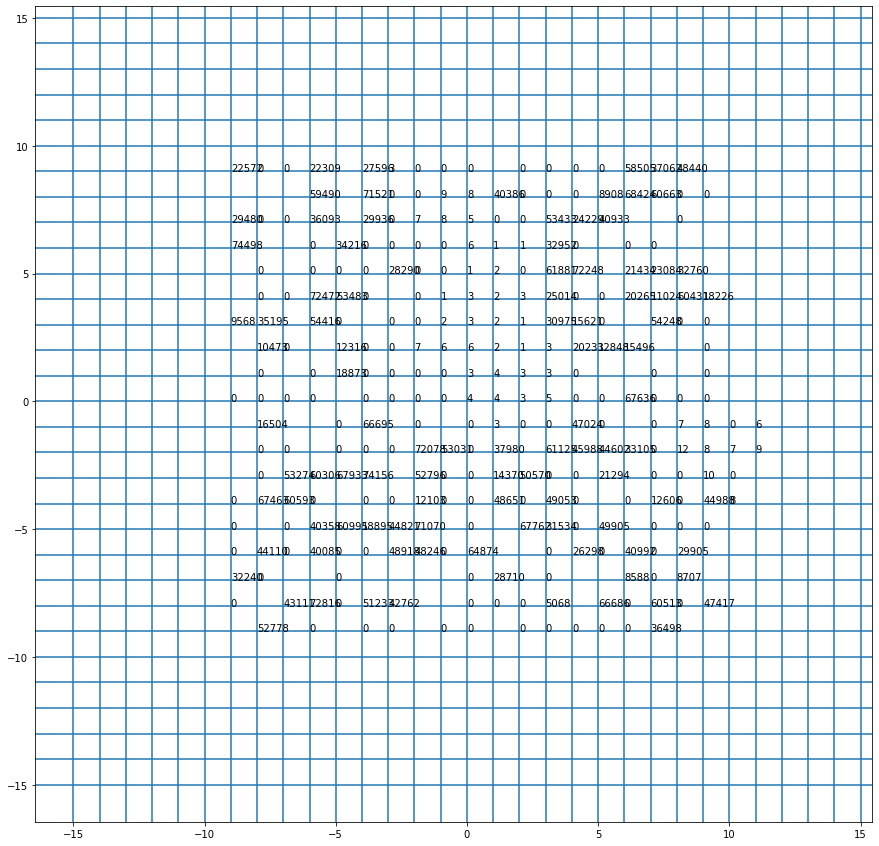

In [11]:
# Write your answer here
xc = []
yc = []
ac = []
for i in locations:
    xc.append(i[0])
    yc.append(i[1])
    ac.append(locations[i])
    

plt.figure(figsize=(15,15)) # Changed these values for testing because image is too smalls
for i in range(-15, 16):
    plt.axvline(i)
    plt.axhline(i)

for i in range(len(xc)):
    if type(ac[i]) == list:
        ac[i] = int(ac[i][0])
    else:
        ac[i] = int(ac[i])
    plt.annotate(ac[i], (xc[i],yc[i]))

plt.show()

### Q.12

Based on the above, what do you conclude about the importance of sampling in a big data project?

In [ ]:
# Write your answer here

### Q.14 Bonus (5 Points)

* If we were interested in estimating the median of all the transactions, instead of the mean of the largest 100 values, would you use this strategy? Illustrate with a small diagram?
  * Your diagram should explain your answer without the need to include text.


In [ ]:
# Write your answer here

## Part II



There is a wealth of information in currently inaccessible or difficult-to-parse documents. Think, for example, of the way webpages are parsed in order to access the information they contain, or the way pdf and documents scans (images) must most often be manipulated by humans to extract the data from them. 

Almost all businesses store, process, and exchange invoices and receipts. Most receipts are stored as pdf or images, making them difficult to process and analyze. This assignment will involve using Hugging Face to fine-tune Microsoft's state-of-the-art deep learning-based model for parsing and annotating digital receipts (Named Entity Recognition).

Often, receipts reveal important data (personal or business related), and their storage and manipulation demand special precautions for security and ethical reasons. As such, there arent many publicly available receipt datasets. Here. you will be using the Consolidated Receipt Dataset (CORD:https://github.com/clovaai/cord), which contains a few hundred receipt images from the food industry and their annotations split across three folders (train, dev and test). While most of the receipts in this dataset are in English, some contian lines in Bahasa Indonesia.


The receipts have been manually annotated to identify locations of relevant information such as subtotal_price, tax, number of items sold, etc. Please refer to the github page above for more information about the data.

* The steps you will accomplish in Part II:

1. Downloading and exploring the data.
2. Processing the data to prepare it for model training
3. Trianing the model
4. Evaluating the performance of the model

* We will not get into the specifics of the model, the objective is to convert potentially big unstructured data (receipt images) into structured data that can be mined. To do so, some understanding of the Huggin Face library is required. 

* Also, the assignment directory contains a file that with helper function to process and visualize the data. You can import the file using:


```python
from assignment_utils import *
```

### Q.1

Begin by downloading the file CORD-1k-001.zip (first file) from the following URL:
https://drive.google.com/drive/folders/14OEWr86qotVBMAsWk7lymMytxn5u-kM6

* Save the file to a local directory outside of your assignment folder. 
* Set up the path to the CORD folder in the variable `DATA_PATH` below.  
* Run the cell to make sure the files are detected. If the code throws any errors, it means the path is not properly setup.


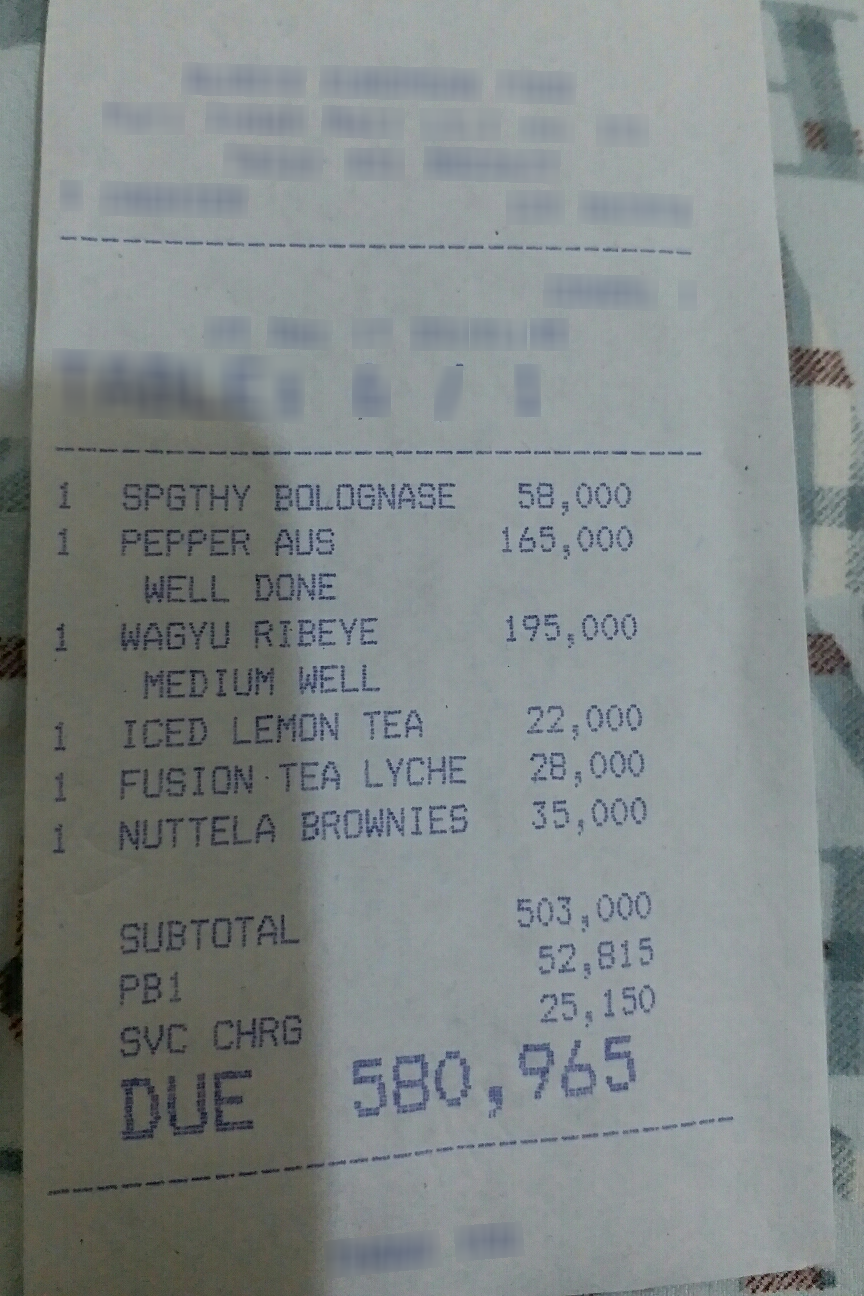

In [18]:
# CHANGE ME
# File name should be changed to execute the correct path
DATA_PATH = "/Users/taylor/UH_Manoa/ICS_438/Assignments/CORD"
# Works this way - content may not have been synced to the disk
image = Image.open(open(DATA_PATH+"/train/image/receipt_00001.png", 'rb'))
image

### Q.2

* Each `png` image has a mapping `json` file that contains the receipt's annotation. 
  * The `png` files are store in the `image` folder
  * The `json` files are stored in the `json` folder

* Read in the json file for `receipt_00001.json` to a variable called `data`
  * As we saw in pevouos assignments, the data will be read as a dictionary. 

* Explore the variable to see the different kesy and values stored in an annotation file

In [20]:
# Write your answer here
# import json
import json
# Set json_file to open the correct data path
json_image = open(DATA_PATH+"/train/json/receipt_00001.json")
# Set data equal to load the json file
data = json.load(json_image)
print("Loading into JSON file complete")

Loading into JSON file complete


### Q.3

The receipt annotation lines are stored under the key `valid_line`. How many annotations does this receipt `receipt_00001` contain?

  * Simply count the number of items stored under the `valid_line` key.

In [25]:
# Write your answer here
#Check the length of the data in valid_line
receipt_annotation = len(data['valid_line'])
print(f"The number of annotations are", receipt_annotation, "in the length of valid lines.")

The number of annotations are 24 in the length of valid lines.


### Q.4

* Each annotation --called  words in the JSON annotation file -- cotnains among other things the words parsed from the `png` receipt file,  a bounding box for each word identified and the annotation (category) the word belongs to.

* Some of anntoation are:

```
`subtotal.subtotal_price`: The receipt subtotal (not including taxes, fees and miscellania).
`menu.nm`: Menu item name (e.g.: Bubble Tea)
`menu.unitprice`: Menu item unit price
`menu.num`: number of items of `menu.nm` ordered
...

```

* What are the words captured in the 12th annotation entry of the `valid_line` key?
* What is the category of these words? 


In [29]:
# Write your answer here
# Declare the line number
line_num = 0
# Checking to see the value for testing
print(data['valid_line'][12]) # Checked and matches
# For every line in the data within the valid lines
for line in data['valid_line']:
    # For every annotation in the single line
    for annotation in line:
        # If the line number is the 12th annotation
        if line_num == 12:
            # Print the Word Captured
            print(f"Word Captured: ", line[annotation])
            # Print the Category of the word capture
            print(f"Category of Word: ", annotation)
        line_num += 1

{'words': [{'quad': {'x2': 209, 'y3': 749, 'x3': 211, 'y4': 753, 'x1': 118, 'y1': 717, 'x4': 120, 'y2': 713}, 'is_key': 0, 'row_id': 2252531, 'text': 'ICED'}, {'quad': {'x2': 341, 'y3': 745, 'x3': 342, 'y4': 748, 'x1': 227, 'y1': 712, 'x4': 228, 'y2': 708}, 'is_key': 0, 'row_id': 2252531, 'text': 'LEMON'}, {'quad': {'x2': 426, 'y3': 742, 'x3': 426, 'y4': 742, 'x1': 360, 'y1': 706, 'x4': 360, 'y2': 706}, 'is_key': 0, 'row_id': 2252531, 'text': 'TEA'}], 'category': 'menu.nm', 'group_id': 6}
Word Captured:  [{'quad': {'x2': 254, 'y3': 560, 'x3': 254, 'y4': 560, 'x1': 118, 'y1': 526, 'x4': 118, 'y2': 526}, 'is_key': 0, 'row_id': 2252527, 'text': 'PEPPER'}, {'quad': {'x2': 338, 'y3': 558, 'x3': 338, 'y4': 558, 'x1': 272, 'y1': 526, 'x4': 272, 'y2': 526}, 'is_key': 0, 'row_id': 2252527, 'text': 'AUS'}]
Category of Word:  words


### Q.5

* Use the function `draw_bounding_box` in the utils to: 

   1. draw all the annotations for `receipt_00001.png`
   2. draw the annotation at index 12 for `receipt_00001.png`

* The function `draw_bounding_box` takes two parameters:
    * A full path to an image.
    * A full path to an annotation file.
    * The index of a feature to draw. If None, all features are displayed

In [30]:
# Write your answer here
from assignment_utils import *

In [36]:
# Draws the bounding box for receipt receipt_0001.png
imgage_one = draw_bounding_box(DATA_PATH+"/train/image/receipt_00001.png", DATA_PATH+"/train/json/receipt_00001.json")
print("Done with first bounding box.")

Done with first bounding box.


In [37]:
# Draws the annotation bounding box for receipt_0001.png at index 12
image_two = draw_bounding_box(DATA_PATH+"/train/image/receipt_00001.png", DATA_PATH+"/train/json/receipt_00001.json", 12)
print("Done with second bounding box.")

Done with second bounding box.


The utilities library also contains a function to read in all the annotations and convert them to lists of lists of annotation features. The function is called `generate_annotations`. The code below uses the function to parse the data in the training folder.

In [38]:
train_path = DATA_PATH+'/train/json/'

# parse the json file and generate three lists of list, which contain the 
# words, boxes and labels contained in each receipt.
words_train, boxes_train, labels_train = generate_annotations(train_path)


  0%|          | 0/787 [00:00<?, ?it/s]

  0%|          | 0/787 [00:00<?, ?it/s]

### Q.6 

* Examine the data (`words_train`, `boxes_train`, `labels_train`) to ensure that you understand its structure. 

* Locate in `boxes_train` and `labels_train` the bounding box and label for the word `Ice` we saw in the annotation at index 12.

* Hint: Use the method `index` on the list of words in `receipt_00001` to find the index of lemon. The bounding box will be at the same index in `boxes_train`, `labels_train` respectively.

* Note that the function `generate_annotations` we ran earlier normalized the bounding box coordinates as a function of each image's width and height. Thus, we need to denormalize if we need to diplay it. You can use the code below to normalize then draw the boudning box. Replace the placeholders `X_1`, `Y_1`, `X_2`, `Y_2` by the values stored in `boxes_train`



```
box = [X_1, Y_1, X_2, Y_2]
denormalize_bbox([X_1, Y_1, X_2, Y_2], image.width, image.height)
image.width
image = Image.open(DATA_PATH+'train/image/receipt_00001.png', )
draw = ImageDraw.Draw(image, "RGBA", )
draw.rectangle(box,  width=2)
image
```

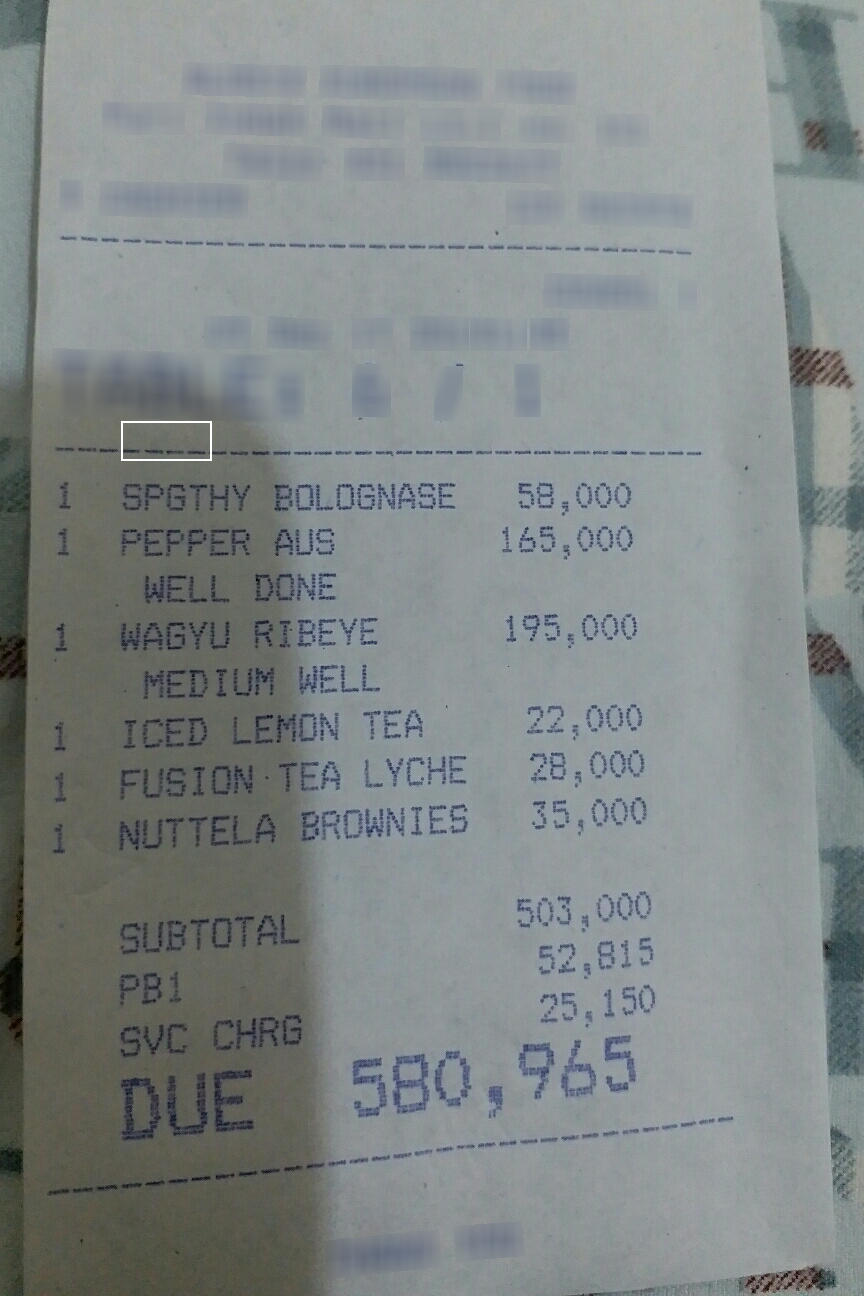

In [48]:
# Write your answer here
for label in boxes_train:
    x = boxes_train.index(label)
    for i in label:
        if i == "Ice":
            y = label.index(i)
            coordinates = boxes_train[x][y]
# Code from above replaced with variables within the models
box = [coordinates[0], coordinates[1], coordinates[2], coordinates[3]]
denormalize_bbox([coordinates[0], coordinates[1], coordinates[2], coordinates[3]], image.width, image.height)
image.width
image = Image.open(DATA_PATH+'/train/image/receipt_00001.png', )
draw = ImageDraw.Draw(image, "RGBA", )
draw.rectangle(box,  width=2)
image

### Q.7

Count the number of occurrences for every feature type in `labels_train`. For example, how many times does the `menu.nm` feature occur in `labels_train`?

In [43]:
# Write your answer here
labels_trained = {}
for label in labels_trained:
    for n in label:
        if n not in labels_trained:
            labels_trained[label] = 0
        labels_trained += 1
print(f"The number of occurances in labels trained are:", labels_trained)

The number of occurances in labels trained are: {}


### Q.8

* Note that some of the labels occur with low frequency in the training dataset (ex. menu.itemsubtotal). Using these rare features to train the model may not lead to a reasonable accuracy. 


* The model we'll use was designed to ignore any label called `O`. The following dictionary's keys represent the labels we're not interested in keeping. 


```python
labels_to_replace = {'menu.etc': 'O', 'menu.itemsubtotal': 'O', 
                     'menu.sub_etc': 'O',  'menu.sub_unitprice': 'O', 
                     'menu.vatyn': 'O', 'void_menu.nm': 'O', 
                     'void_menu.price': 'O', 'sub_total.othersvc_price': 'O', 'None': 'O'}
```

* Use this list to repalce all the keys in `labels`. 



In [44]:
# Write your answer here
# The labels to replace
# Attempt to do list comprehension from: https://stackoverflow.com/questions/51262549/replace-dictionaries-keys-with-values-from-list
labels_to_replace = {'menu.etc': 'O', 'menu.itemsubtotal': 'O', 
                     'menu.sub_etc': 'O',  'menu.sub_unitprice': 'O', 
                     'menu.vatyn': 'O', 'void_menu.nm': 'O', 
                     'void_menu.price': 'O', 'sub_total.othersvc_price': 'O', 'None': 'O'}
for n in labels_to_replace:
    if n in labels_trained:
        del lablels_trained[n]

### Q.9
Make sure the function above worked by counting again how many times each feature appears in the `labels_train` dataset. A new entry (`O`) should now appear in the counts and its value should be the sum of the values for keys `labels_to_replace` dictionary prior to the update.

In [98]:
# Write your answer here

Counter({'menu.cnt': 1955,
         'menu.nm': 5296,
         'menu.price': 2082,
         'sub_total.subtotal_price': 1176,
         'sub_total.service_price': 274,
         'sub_total.tax_price': 1010,
         'sub_total.etc': 241,
         'total.total_price': 1686,
         'menu.sub_nm': 592,
         'total.cashprice': 1098,
         'total.changeprice': 1033,
         'total.menutype_cnt': 105,
         'total.menuqty_cnt': 506,
         'sub_total.discount_price': 162,
         'menu.unitprice': 611,
         'total.total_etc': 69,
         'total.creditcardprice': 315,
         'menu.num': 94,
         'menu.sub_cnt': 140,
         'menu.discountprice': 319,
         'menu.sub_price': 122,
         'total.emoneyprice': 115,
         'O': 55})

* We need to complete a couple more steps to prepare the data so it's in the format expected by LayoutLMv2. Please see the three next cells below for the code needed. 

* Run these cells before continuing. The comments in each cell describe what the code does.

In [104]:

### RUN ME
# The model we'll use expect the labels to be number (0, 1, 2, ... ) instead of ('menu.sub_price', 'total.total_etc', 'menu.num')
# We create two dictionary to access labels from numbers and  number from labels.
label2id = {label: idx for idx, label in enumerate(Counter(all_labels).keys())}
id2label = {idx: label for idx, label in enumerate(Counter(all_labels).keys())}


In [20]:
### RUN ME

# Training the model is much easier if we convert the training dataset into
# A pytorch dataset. The class CORDDataset create this dataset and structures 


from os import listdir
from torch.utils.data import Dataset
import torch
from PIL import Image

class CORDDataset(Dataset):
    """CORD dataset."""

    def __init__(self, annotations, image_dir, processor=None, max_length=512):
        """
        Args:
            annotations (List[List]): List of lists containing the word-level annotations (words, labels, boxes).
            image_dir (string): Directory with all the document images.
            processor (LayoutLMv2Processor): Processor to prepare the text + image.
        """
        self.words, self.labels, self.boxes = annotations
        self.image_dir = image_dir
        self.image_file_names = [f for f in sorted(listdir(image_dir))]
        self.processor = processor

    def __len__(self):
        return len(self.image_file_names)

    def __getitem__(self, idx):
        # first, take an image
        item = self.image_file_names[idx]
        image = Image.open(self.image_dir + item).convert("RGB")

        # get word-level annotations 
        words = self.words[idx]
        boxes = self.boxes[idx]
        word_labels = self.labels[idx]

        assert len(words) == len(boxes) == len(word_labels)
        
        word_labels = [label2id[label] for label in word_labels]
        # use processor to prepare everything
        encoded_inputs = self.processor(image, words, boxes=boxes, word_labels=word_labels, 
                                        padding="max_length", truncation=True, 
                                        return_tensors="pt")
        
        # remove batch dimension
        for k,v in encoded_inputs.items():
          encoded_inputs[k] = v.squeeze()

        assert encoded_inputs.input_ids.shape == torch.Size([512])
        assert encoded_inputs.attention_mask.shape == torch.Size([512])
        assert encoded_inputs.token_type_ids.shape == torch.Size([512])
        assert encoded_inputs.bbox.shape == torch.Size([512, 4])
        assert encoded_inputs.image.shape == torch.Size([3, 224, 224])
        assert encoded_inputs.labels.shape == torch.Size([512]) 
      
        return encoded_inputs
        

In [21]:
### RUN ME
# * We build an instance of the CORDDataset using the training data

# * A processor, contains, among other objects, a tokenizer to tokenize 
# and encode the words and combine the input_ids, the bounding boxes, 
# the labels in a structure hat's meaningful for the model

# * The dataloader allows us to bactch the data into smaller chunks 
# and train the model wih each chunk independently


from torch.utils.data import DataLoader
from transformers import LayoutLMv2Processor

train = [words_train, labels_train, boxes_train]
processor = LayoutLMv2Processor.from_pretrained("microsoft/layoutlmv2-base-uncased", revision="no_ocr")
train_dataset = CORDDataset(annotations=train,
                            image_dir=DATA_PATH+'train/image/', 
                            processor=processor)

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)



### Q.10

* The annotation for receipt 15 contains 32 words. You can verify that by executing the following:

```python
len(words_train[15])
```
* However, if you manually encode the words of receipt 15, you get an output of size 66. You can verify that by running the following:

```python
enoded_receipt_15 = processor.tokenizer.backend_tokenizer.encode(im_words, is_pretokenized=True).tokens
print(f"The encoded text of image_15 contains {len(enoded_receipt_15)} tokens")
```

* Why do we get 66 tokens if there are only 32 words? 


In [7]:
# Write your answer here

### Q.11

* After encoding the words into tokens, we need to convert them into ids. Doing so using the processor object we created earlier to process the words in image 15 results in an `input_ids` array of size 512. You can verify that by running the following:

```python
im_name = train_dataset.image_file_names[15]
image=  Image.open(DATA_PATH +"train/image/"+im_name).convert("RGB")
im_words = train_dataset.words[15]
im_boxes = train_dataset.boxes[15]
im_word_labels = train_dataset.labels[15]

processed_image_15 = processor(
                               image, 
                               im_words, 
                               boxes=im_boxes, 
                               word_labels=word_labels, 
                               padding="max_length", 
                               truncation=True, 
                               return_tensors="pt"
                               )
print(processed_image_15["input_ids"].shape)
```

* Why does `input_ids` have 512 values when image 15 only has 32 words?

* Hint: You can use the `decode` method of the tokenizer object to inspect the content of `processed_image_15['input_ids'][0]`, the list containing the ids converted from image 15 text

```
processor.tokenizer.decode(processed_image_15['input_ids'][0])
```


In [ ]:
### Write your answer here

Time to train the `LayoutLMv2ForTokenClassification` model with the CORD datasets. This will probably take a few hours on a laptop or substantially less on Google Colab using the GPU. Even though I've run the model for you, I'm including below the code so you can see how the data prepared earlier is used to train the model. So, **you do not need to run the code below to train**. The code is fairly standard -- same process used for training any deep learning model. 

In [106]:
# from transformers import LayoutLMv2ForTokenClassification, AdamW
# import torch
# from tqdm.notebook import tqdm

# model = LayoutLMv2ForTokenClassification.from_pretrained('microsoft/layoutlmv2-base-uncased',
#                                                                       num_labels=len(labels))

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)
# optimizer = AdamW(model.parameters(), lr=5e-5)

# global_step = 0
# num_train_epochs = 4

# #put the model in training mode
# model.train() 
# for epoch in range(num_train_epochs):  
#    print("Epoch:", epoch)
#    for batch in tqdm(train_dataloader):
#         # get the inputs;
#         input_ids = batch['input_ids'].to(device)
#         bbox = batch['bbox'].to(device)
#         image = batch['image'].to(device)
#         attention_mask = batch['attention_mask'].to(device)
#         token_type_ids = batch['token_type_ids'].to(device)
#         labels = batch['labels'].to(device)

#         # zero the parameter gradients
#         optimizer.zero_grad()
        
#         # forward + backward + optimize
#         outputs = model(input_ids=input_ids,
#                         bbox=bbox,
#                         image=image,
#                         attention_mask=attention_mask,
#                         token_type_ids=token_type_ids,
#                         labels=labels) 
#         loss = outputs.loss
        
#         # print loss every 100 steps
#         if global_step % 100 == 0:
#           print(f"Loss after {global_step} steps: {loss.item()}")

#         loss.backward()
#         optimizer.step()
#         global_step += 1

# model.save_pretrained(DATA_PATH+"LayoutLMv2_checpointed")

### Q.12

Before running the trained model, we must generate the test data with which our model will be tested. Create a `test_dataloader` variable that contains all the information needed to run the trianed model. To do so, you can use the exact same procedure/steps used above to go `words_train`, `labels_train` and `boxes_train` to a `train_dataloader` object. The steps are:

1. Use the function `generate_annotations` to instantiate variables `words_test`, `labels_test` and `boxes_test`
2. Replace the labels that have a low frequency. These labels are the keys of the dictionary `labels_to_replace`
3. Build a list called test from `words_test`, `labels_test` and `boxes_test`
4. Build a `test_dataset` object of type `CORDDataset`
5. Build a `test_dataloader` object of type DataLoader

In [ ]:
# Write your answer here

* Use the trained model on the data stored in `test_dataloader`. First you'll need to:

    

1. Download the trained model from the following URL:

2. Untar the archive in a folder outside of your assignment folder. 

3. Load the trained model using: 

```python

    model_path = <path model folder>+"/trained_LayoutLMv2_checkpoint"

    model =  LayoutLMv2ForTokenClassification.from_pretrained(model_path, num_labels=23)

```

* Substitute <path model folder> with the folder where you uncompressed the archive.
    
* The code below illustrate how you can run the model with a receipt.


In [107]:
# get a a single instance (receipt info) formt he test dataset
encoding = test_dataset[0]

# encogings info is stores in 1-D array. For exampl input_ids, attention_mask 
# are all in array of size 512. The model requires matrix instead. 
# we use the code below to transform it into a matrix.
for k,v in encoding.items():
  encoding[k] = v.unsqueeze(0).to(device)

# put the model in evaluation modde (instead of training mode)
model.eval()
# forward pass
# run the model
outputs = model(input_ids=encoding['input_ids'], attention_mask=encoding['attention_mask'],
                token_type_ids=encoding['token_type_ids'], bbox=encoding['bbox'],
                image=encoding['image'])

outputs

* The cell below shows how you can run the code with all data in `test_dataloader`

In [ ]:
## Propoer way to call the model
model.eval()
for batch in tqdm(test_dataloader, desc="Evaluating"):
    with torch.no_grad():
        input_ids = batch['input_ids'].to(device)
        bbox = batch['bbox'].to(device)
        image = batch['image'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        labels = batch['labels'].to(device)

        # forward pass
        outputs = model(input_ids=input_ids, bbox=bbox, image=image, attention_mask=attention_mask, 
                        token_type_ids=token_type_ids, labels=labels)

### Q.13 

* *Manually* compute the precision, recall, f1-score of the trained model
  * Manually above means you cannot use an external library to compute these stats.
  * Note that this question is intentially more open-ended -- you will need to explore the content of the `outputs` variable and potentially read the model documentation to answer this quesiton.

In [ ]:
# Write your answer here